# Pull/push distributions

In this example, we show how to use {func}`moscot.plotting.push` and {func}`moscot.plotting.pull` plotting functions.

:::{note}
These visualization functions are only implemented for non-spatial problems.
:::

To see how pull-back or push-forward cell distributions can be visualized for problems incorporating spatial information, please have a look at the {doc}`../../tutorials/index`. Here, we use the {func}`~moscot.datasets.hspc` dataset to demonstrate the usage of {func}`moscot.plotting.push` and {func}`moscot.plotting.pull` with the {class}`~moscot.problems.time.TemporalProblem`. In this context, the pull-back distribution corresponds to the set of ancestor cells, while the push-forward distribution corresponds to the set of descending cells.

:::{seealso}
- See {doc}`200_cell_transitions` on how to plot cell transitions.
- See {doc}`300_sankey` on how to plot the Sankey diagram.
:::

## Imports and data loading

In [1]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

import moscot.plotting as mtp
from moscot import datasets
from moscot.problems.time import TemporalProblem

Load the {func}`~moscot.datasets.hspc` dataset.

In [2]:
adata = datasets.hspc()
adata

AnnData object with n_obs × n_vars = 4000 × 2000
    obs: 'day', 'donor', 'cell_type', 'technology', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'hvg', 'neighbors', 'neighbors_atac', 'pca', 'umap'
    obsm: 'X_lsi', 'X_pca', 'X_umap_ATAC', 'X_umap_GEX', 'peaks_tfidf'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'neighbors_atac_connectivities', 'neighbors_atac_distances'

## Prepare and solve the problem

First, we need to prepare and solve the problem. Here, we set the `threshold` parameter to a relatively high value to speed up convergence at the cost of a lower quality solution.

In [3]:
tp = TemporalProblem(adata).prepare(time_key="day").solve(epsilon=1e-2, threshold=1e-2)

INFO     Ordering Index(['4c45fb900fbb', 'c462df3e03b5', '27b9aa554758', '9a0cbad09594',                           
                '98b88fc30c58', '5008d863224a', '904d6bcfd520', '5287a74337a0',                                    
                '862d6d6e4e49', '288e38fb37aa',                                                                    
                ...                                                                                                
                '038518e366a9', '809ba84a9cbb', '4264c55de7d0', 'a7097007fbea',                                    
                '1381ec6cb466', '946cf349f84e', 'da6baa1b0624', 'ba7d40e15f3d',                                    
                '69451694ec4c', '193992d571a5'],                                                                   
               dtype='object', name='cell_id', length=4000) in ascending order.                                    
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`       

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(1235, 1201)].                                  
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(1201, 798)].                                   


As for all plotting functionalities in {mod}`moscot`, we first call the method of
the problem class, which stores the results of the computation in the {class}`~anndata.AnnData` instance. Let us assume we look for the descendants of cells of time point 4 in time point 7. We can specify whether we want to return the result via the `return_data` parameter.

In [4]:
tp.push(source=4, target=7)

## Plot push distribution

We can now visualize the result. As we have multiple time points in the *UMAP* embedding, it is best to visualize in one plot all the cells corresponding to time point 4, and then the ones corresponding to the descending cells. As the {class}`~anndata.AnnData` instance contains *UMAP* embeddings for both gene expression and *ATAC*, we need to define which one to use via the ``basis`` parameter.

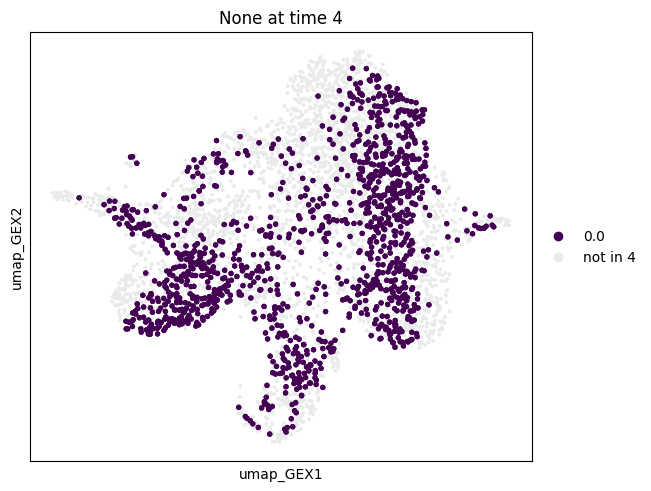

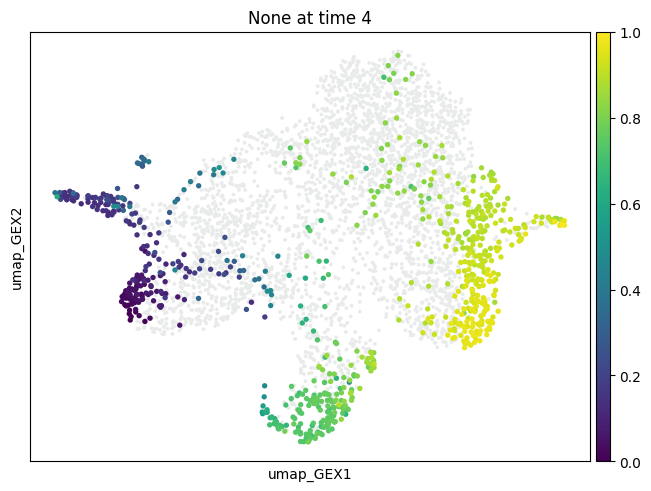

In [5]:
mtp.push(tp, time_points=[4], basis="umap_GEX")
mtp.push(tp, time_points=[7], basis="umap_GEX")

By default, the result of the {meth}`TemporalProblem.push <moscot.problems.time.TemporalProblem.push>` is saved in {attr}`adata.uns['moscot_results']['push']['push'] <anndata.AnnData.uns>` and overrides this element every time the method is called. To prevent this, we can specify the parameter `key_added`, as shown below.

We can also visualize the descendants of only a subset of categories of an {attr}`~anndata.AnnData.obs` column by specifying the `data` and the `subset` parameter.

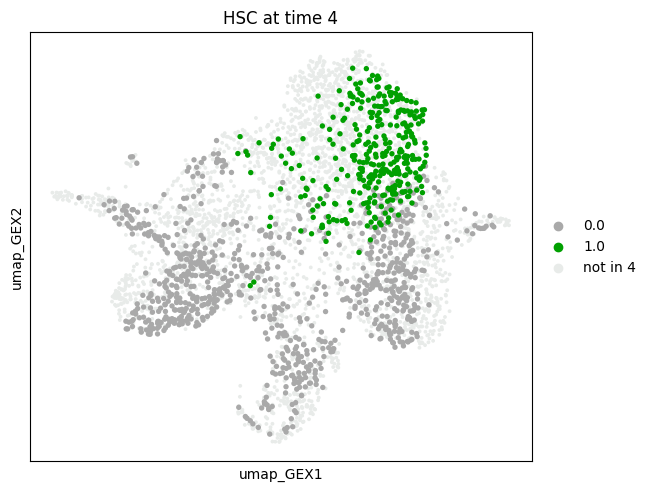

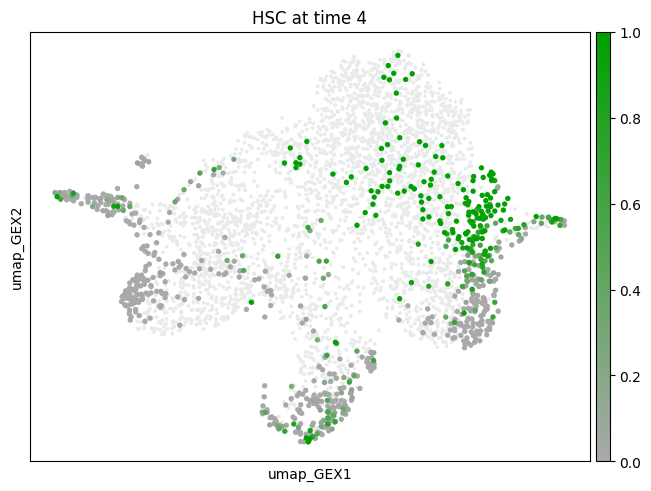

In [6]:
new_key = "subset_push"
tp.push(
    source=4,
    target=7,
    data="cell_type",
    subset="HSC",
    key_added=new_key,
)
mtp.push(tp, time_points=[4], key=new_key, basis="umap_GEX")
mtp.push(tp, time_points=[7], key=new_key, basis="umap_GEX")